In [1]:
import numpy as np
import pandas as pd
from block_based_rlnc import BlockBasedRLNC
import plotly.express as px
import plotly.graph_objects as go


In [2]:
sims=[]

In [21]:
del sims[-1]

In [3]:
def simulate(config,name):
    rlnc = BlockBasedRLNC(**config);
    analytics_result = rlnc.run_simulation()
    df = analytics_result.get_analytics_data_frame()
    df.name = name
    return [df,config]

In [13]:
%%capture

config=dict(field_order=2**8, generation_size=16,
              packet_size=16, total_size=1024*64,
              initial_redundancy=1, initial_window_size=1,
              loss_mode="ge",  ge_loss_good_to_bad=0.05, ge_loss_bad_to_good=0.2, ee_loss_error= 0.25, loss_rate=0.2,
              adjust_algorithm="primary", seed=2, force_to_recreate_new_data=False)

result = simulate(config,"Gilbert Elliott - Primary")
sims.append(result)

In [14]:
%%capture

config=dict(field_order=2**8, generation_size=16,
              packet_size=16, total_size=1024*64,
              initial_redundancy=1, initial_window_size=1,
              loss_mode="ge",  ge_loss_good_to_bad=0.05, ge_loss_bad_to_good=0.2, ee_loss_error= 0.25, loss_rate=0.2,
              adjust_algorithm="none", seed=2, force_to_recreate_new_data=False)

result = simulate(config,"Gilbert Elliott -  None")
sims.append(result)

In [6]:
%%capture

config=dict(field_order=2**8, generation_size=16,
              packet_size=16, total_size=1024*64,
              initial_redundancy=1, initial_window_size=1,
              loss_mode="exponential",  ge_loss_good_to_bad=0.05, ge_loss_bad_to_good=0.2, ee_loss_error= 0.25, loss_rate=0.2, exponential_loss_param=0.045,
              adjust_algorithm="primary", seed=2, force_to_recreate_new_data=False)

result = simulate(config,"Exponential - Primary")
sims.append(result)

In [7]:
%%capture

config=dict(field_order=2**8, generation_size=16,
              packet_size=16, total_size=1024*64,
              initial_redundancy=1, initial_window_size=1,
              loss_mode="exponential",  ge_loss_good_to_bad=0.05, ge_loss_bad_to_good=0.2, ee_loss_error= 0.25, loss_rate=0.2, exponential_loss_param=0.045,
              adjust_algorithm="none", seed=2, force_to_recreate_new_data=False)

result = simulate(config,"Exponential - None")
sims.append(result)

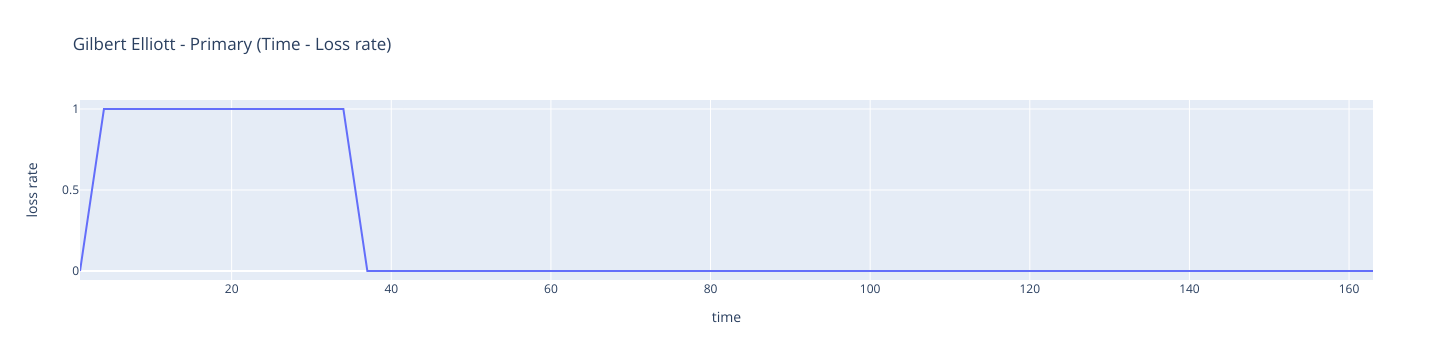

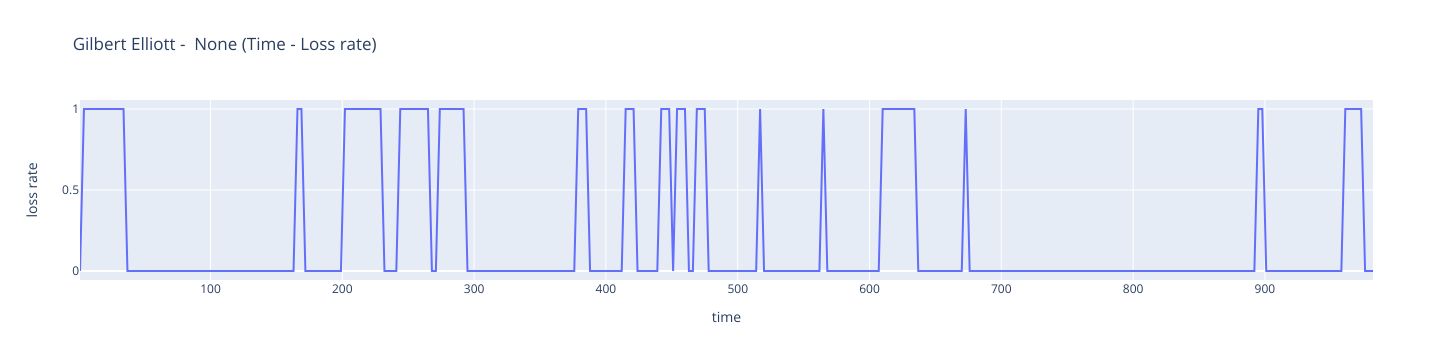

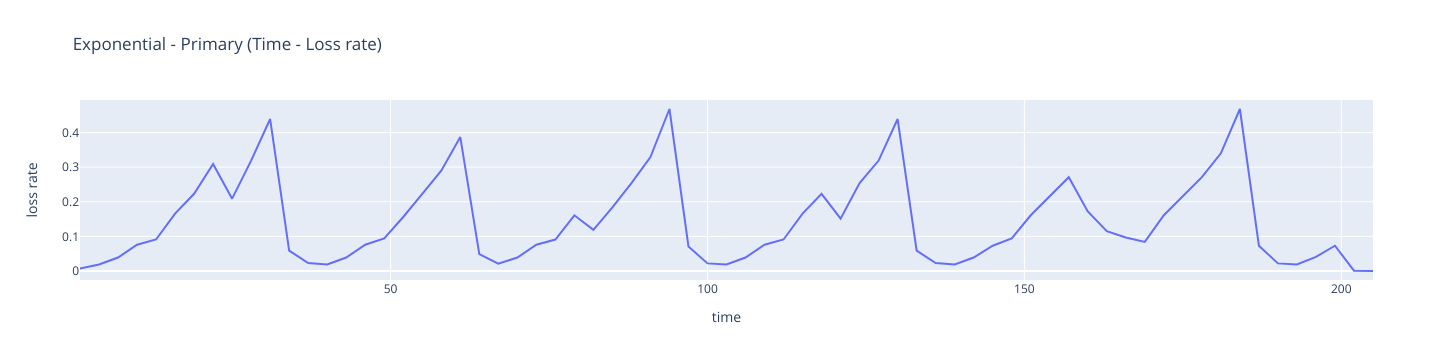

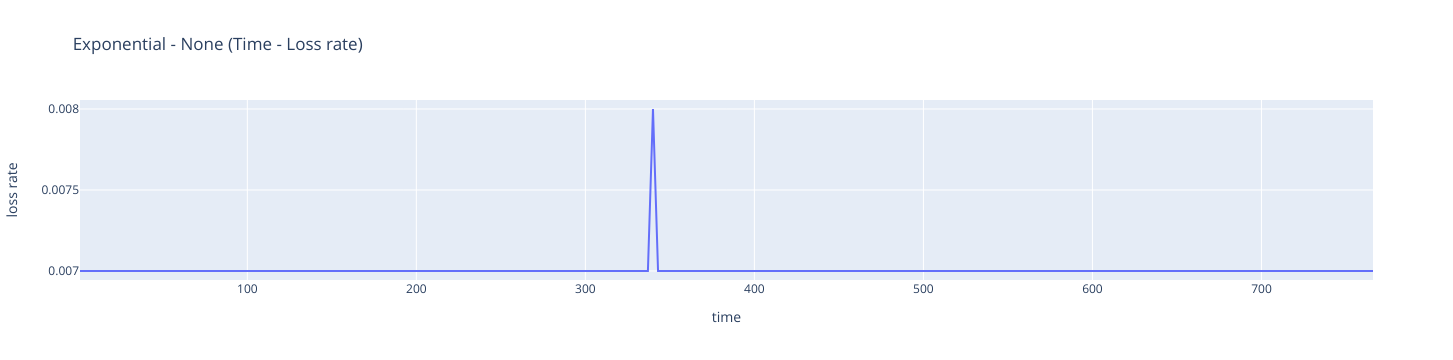

In [22]:
for index,sim in enumerate(sims):
    df=sim[0]
    fig = px.line(df.query("type=='send'"), x="time", y="loss rate", title=df.name+' (Time - Loss rate)')
    fig.show()
    fig.write_image("fig1.pdf")

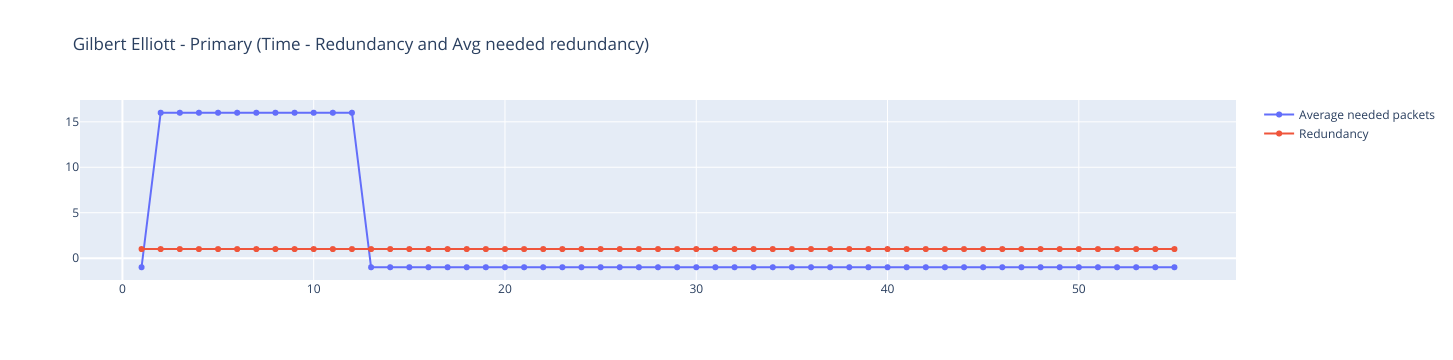

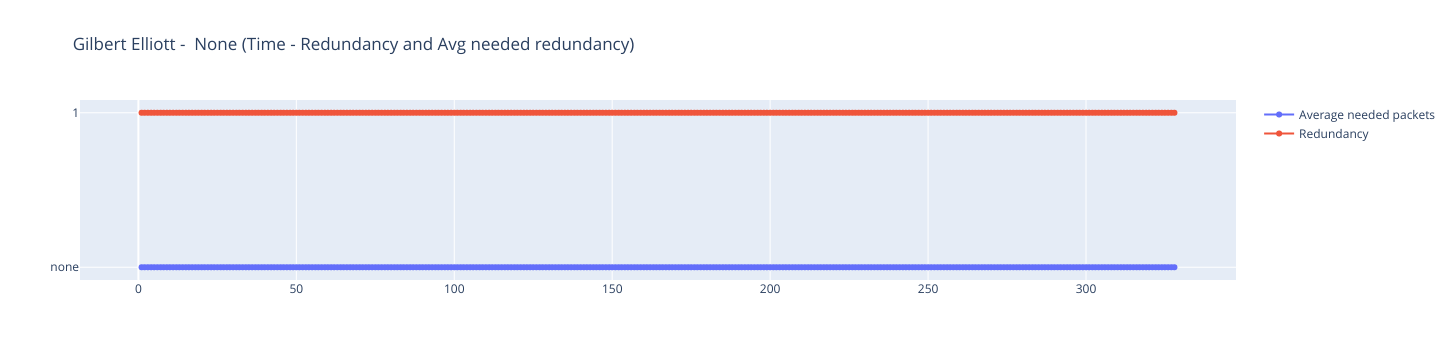

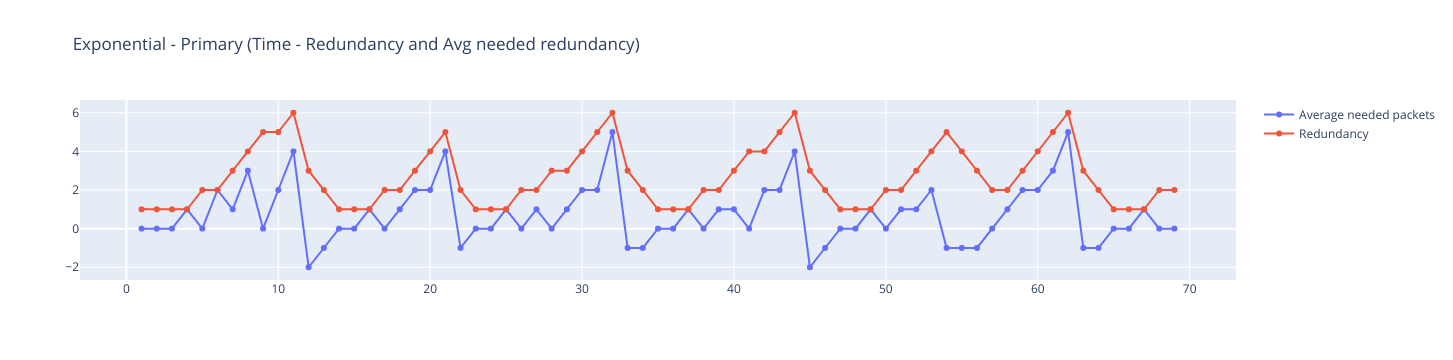

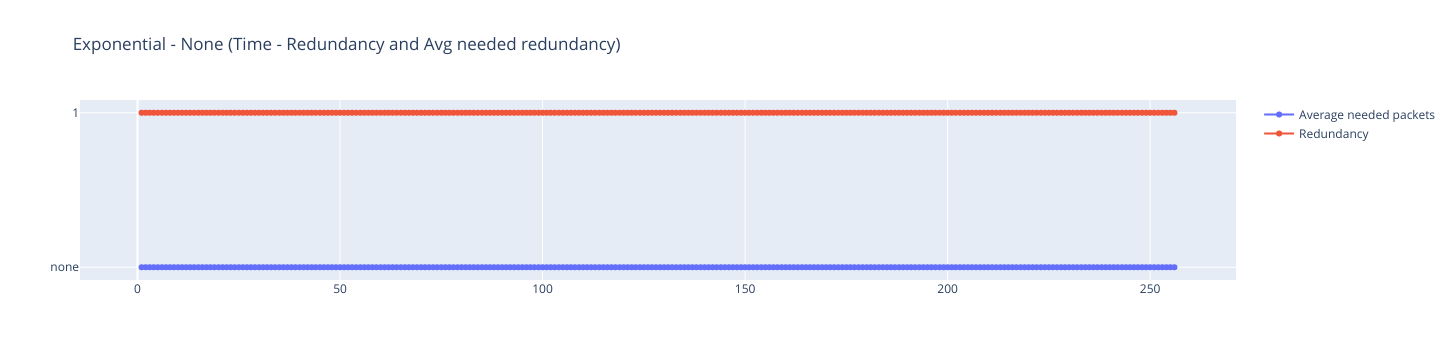

In [23]:
for index,sim in enumerate(sims):
    dataframe = sim[0]
    fig = go.Figure()
    fig.update_layout(title_text=dataframe.name+' (Time - Redundancy and Avg needed redundancy)',)


    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='feedback'")["average needed packets"],
        mode="lines+markers",
        name="Average needed packets",
        textposition="top center",
    ))

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["redundancy"],
        mode="lines+markers",
        name="Redundancy",
        textposition="top center"
    ))


    fig.show()
    fig.write_image("fig1.pdf")


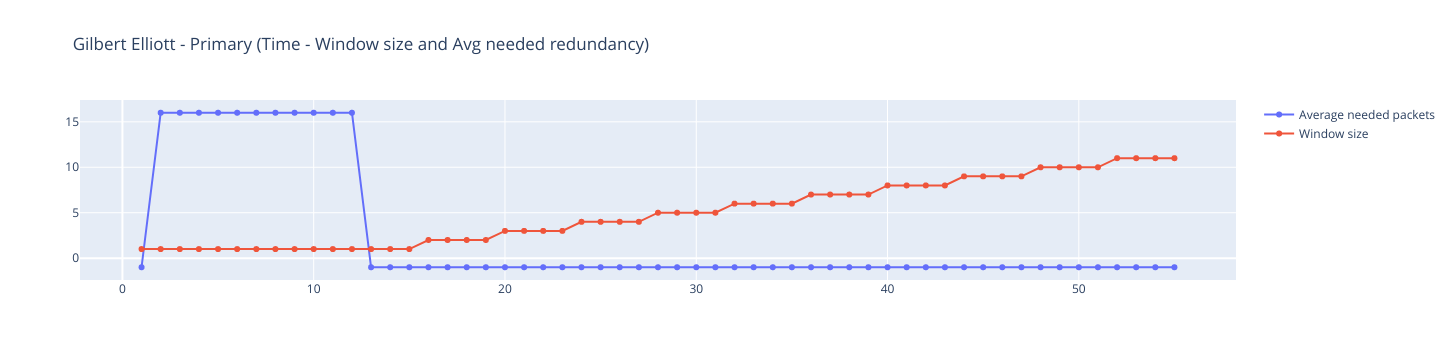

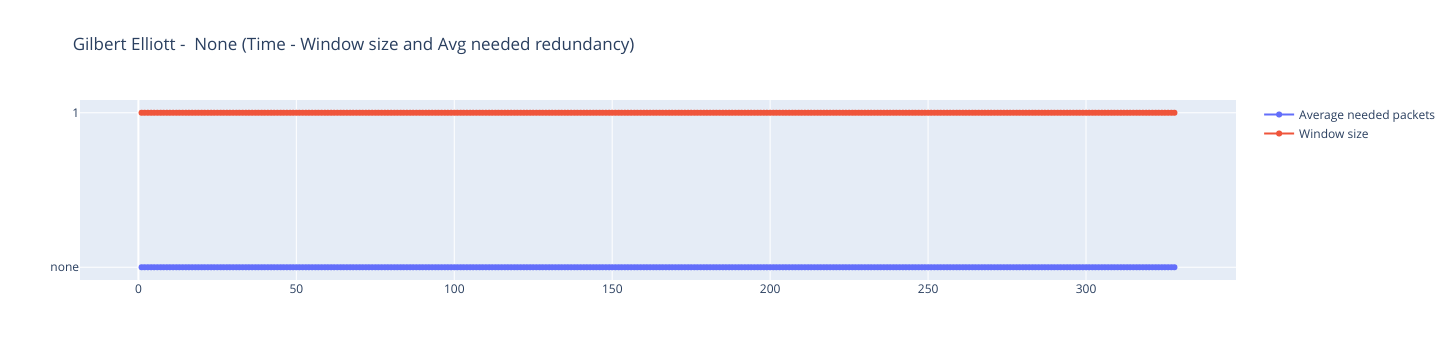

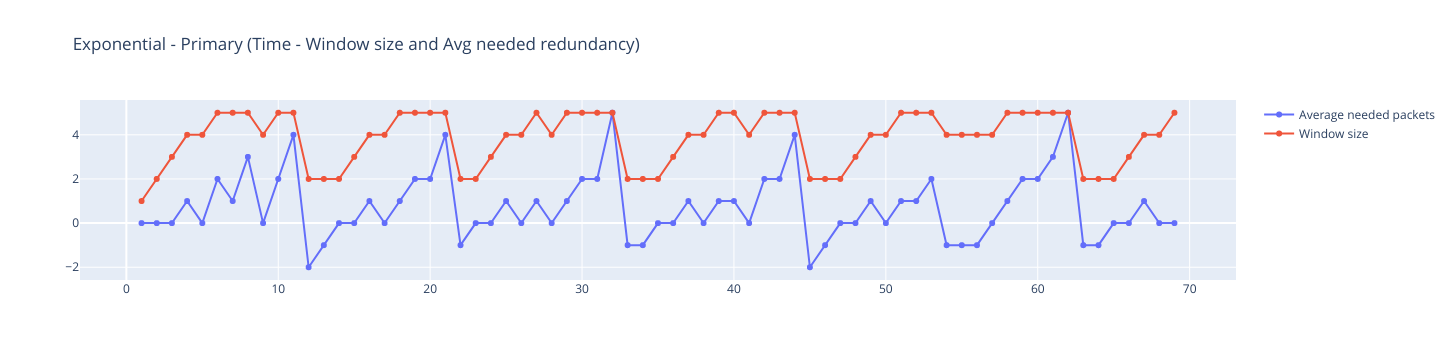

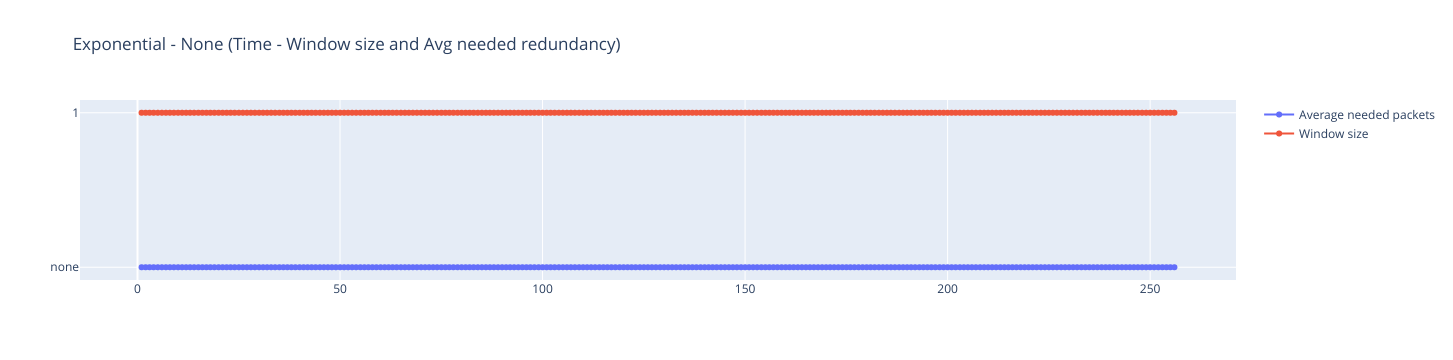

In [24]:
for index,sim in enumerate(sims):
    dataframe = sim[0]
    fig = go.Figure()
    fig.update_layout(title_text=dataframe.name+' (Time - Window size and Avg needed redundancy)',)

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='feedback'")["average needed packets"],
        mode="lines+markers",
        name="Average needed packets",
        textposition="top center",
    ))

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["window size"],
        mode="lines+markers",
        name="Window size",
        textposition="top center"
    ))


    fig.show()



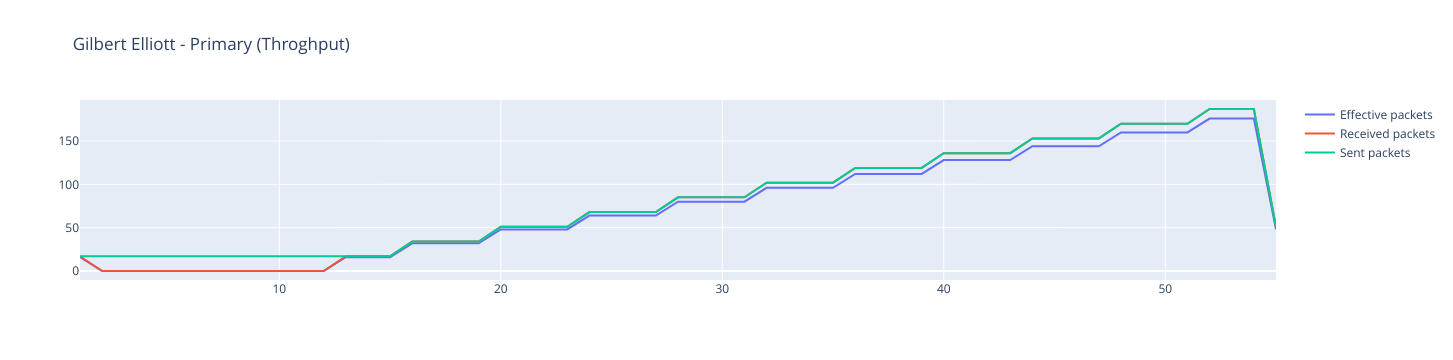

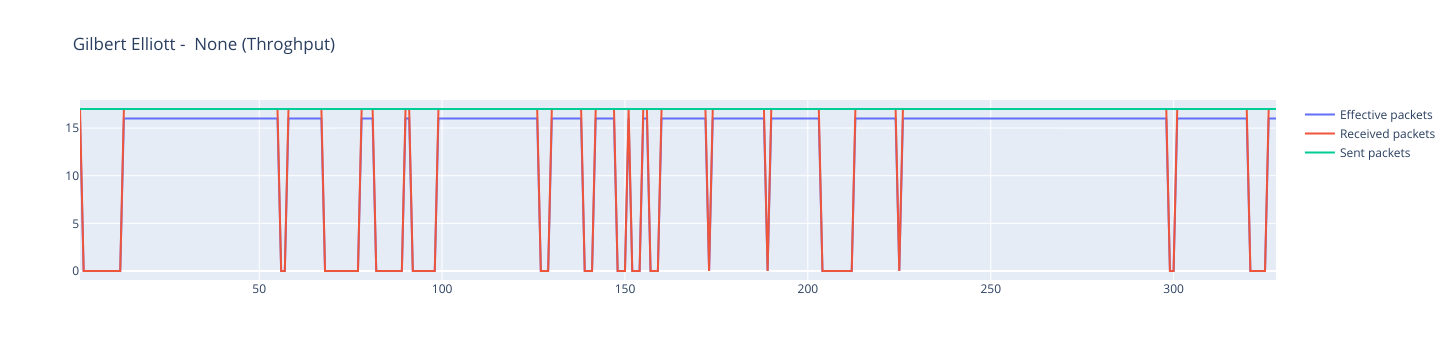

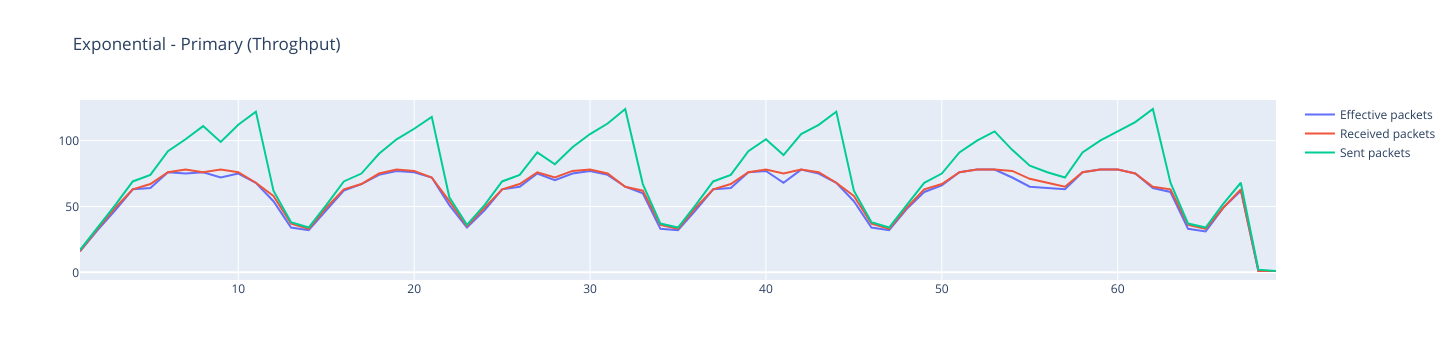

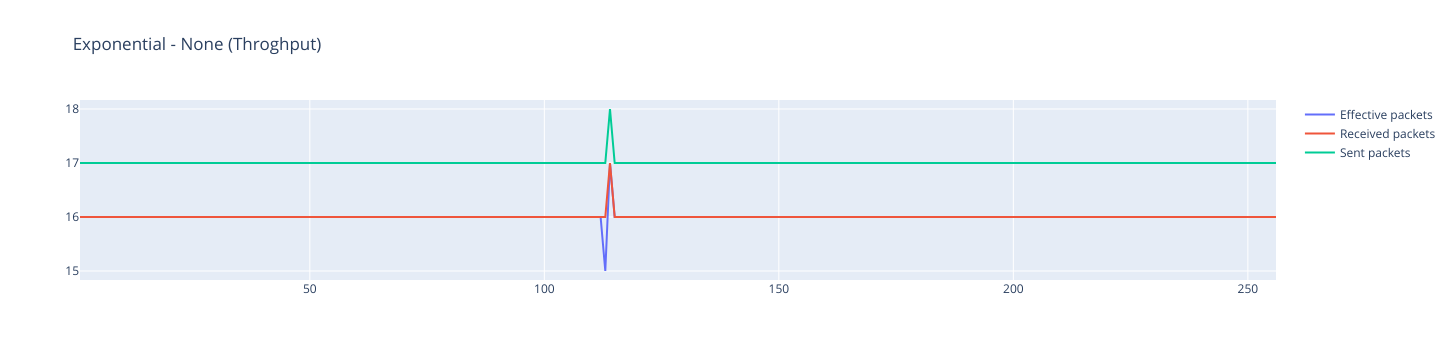

In [25]:
for index,sim in enumerate(sims):
    dataframe = sim[0]
    fig = go.Figure()
    fig.update_layout(title_text=dataframe.name+' (Throghput)')

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='receive'")["effective packets"],
        mode="lines",
        name="Effective packets",
        textposition="top center",
    ))

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='receive'")["received packets"],
        mode="lines",
        name="Received packets",
        textposition="top center",
    ))

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["total sent packets"],
        mode="lines",
        name="Sent packets",
        textposition="top center",
    ))


    fig.show()


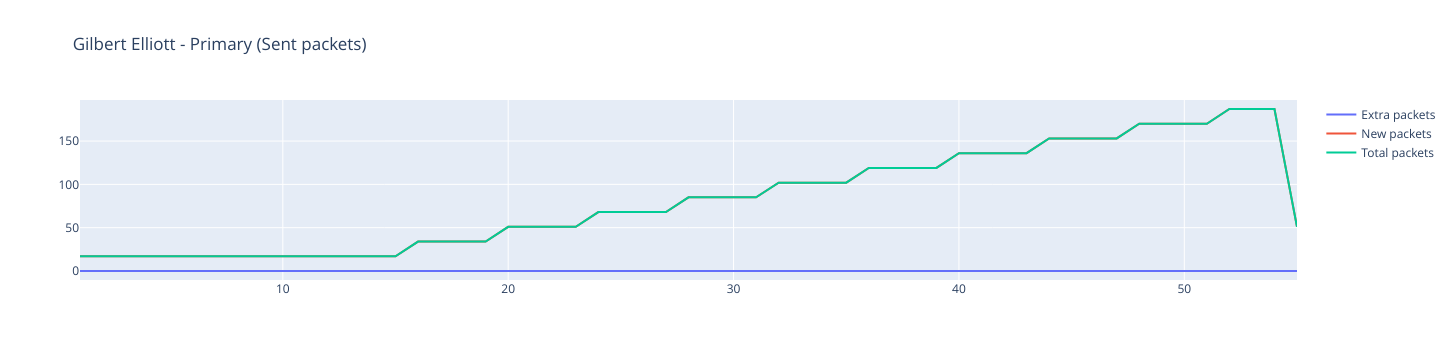

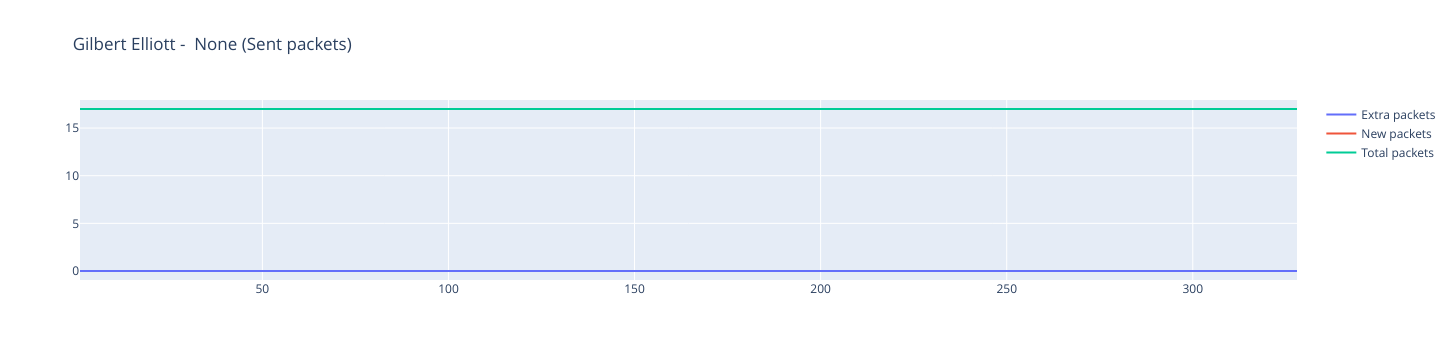

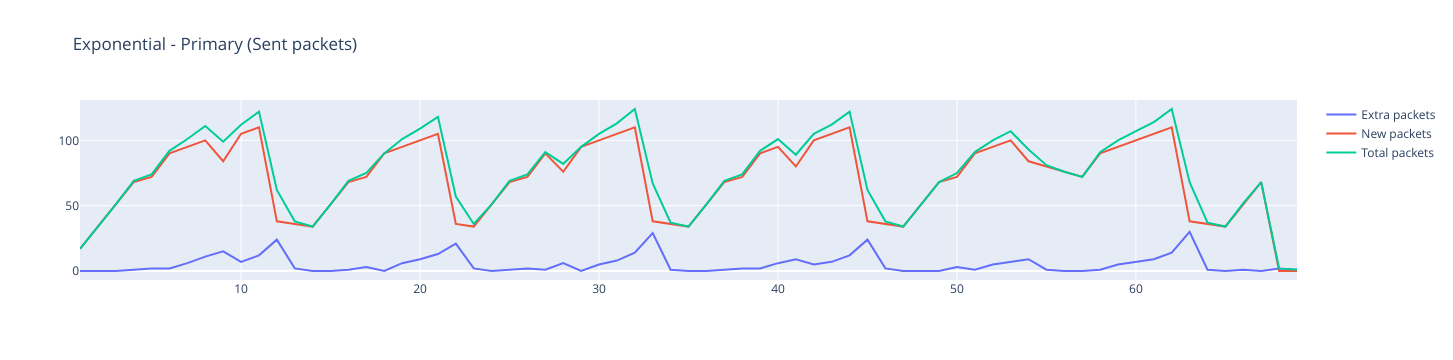

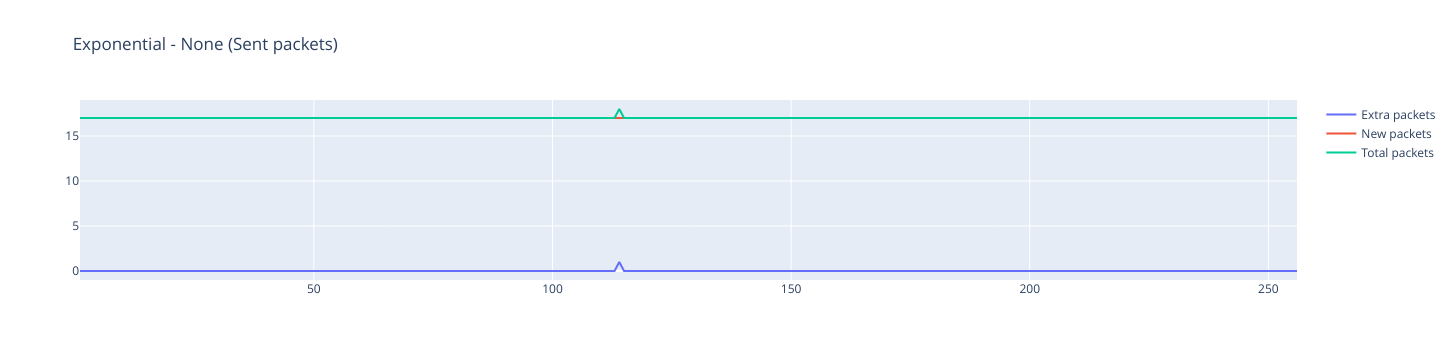

In [26]:
for index,sim in enumerate(sims):
    dataframe = sim[0]
    fig = go.Figure()
    fig.update_layout(title_text=dataframe.name+' (Sent packets)')
    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["extra packets count"],
        mode="lines",
        name="Extra packets",
        textposition="top center",
    ))
    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["new coded packets count"],
        mode="lines",
        name="New packets",
        textposition="top center",
    ))
    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["total sent packets"],
        mode="lines",
        name="Total packets",
        textposition="top center",
    ))
    fig.show()
